In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

In [2]:
olympics = pd.read_csv("../input/120-years-of-olympic-history-athletes-and-results/athlete_events.csv")
o_region = pd.read_csv("../input/120-years-of-olympic-history-athletes-and-results/noc_regions.csv")
olympics

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN


# Data Exploration

In [3]:
def missing_values_analysis(df):
    na_columns_ = [col for col in df.columns if df[col].isnull().sum() > 0]
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending=True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    missing_df = pd.concat([n_miss, np.round(ratio_, 2)], axis=1, keys=['Total Missing Values', 'Ratio'])
    missing_df = pd.DataFrame(missing_df)
    return missing_df

def check_df(df, head=5):
    print("--------------------- Shape --------------------")
    print(df.shape)
    print("-------------------- Types ---------------------")
    print(df.dtypes)
    print("----------------- NaN Analysis -----------------")
    print(missing_values_analysis(df))
    print("--------------------- Head ---------------------")
    print(df.head())

check_df(olympics)

--------------------- Shape --------------------
(271116, 15)
-------------------- Types ---------------------
ID          int64
Name       object
Sex        object
Age       float64
Height    float64
Weight    float64
Team       object
NOC        object
Games      object
Year        int64
Season     object
City       object
Sport      object
Event      object
Medal      object
dtype: object
----------------- NaN Analysis -----------------
        Total Missing Values  Ratio
Age                     9474   3.49
Height                 60171  22.19
Weight                 62875  23.19
Medal                 231333  85.33
--------------------- Head ---------------------
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Li

# Exploratory Data Analysis

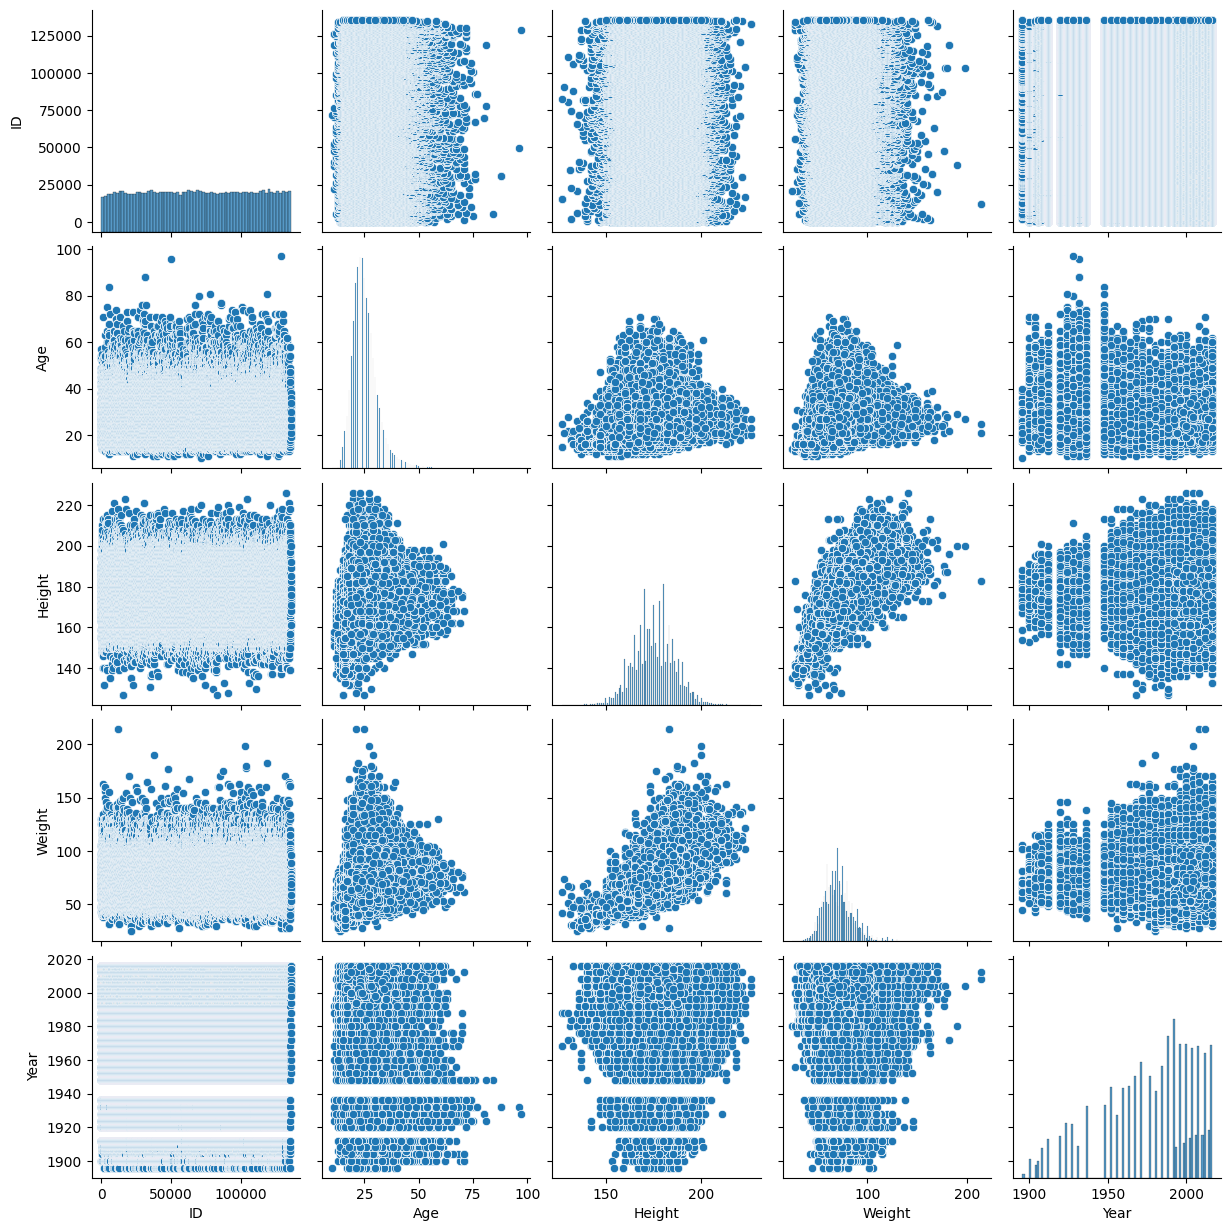

In [4]:
sns.pairplot(olympics)

# Age


In [5]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


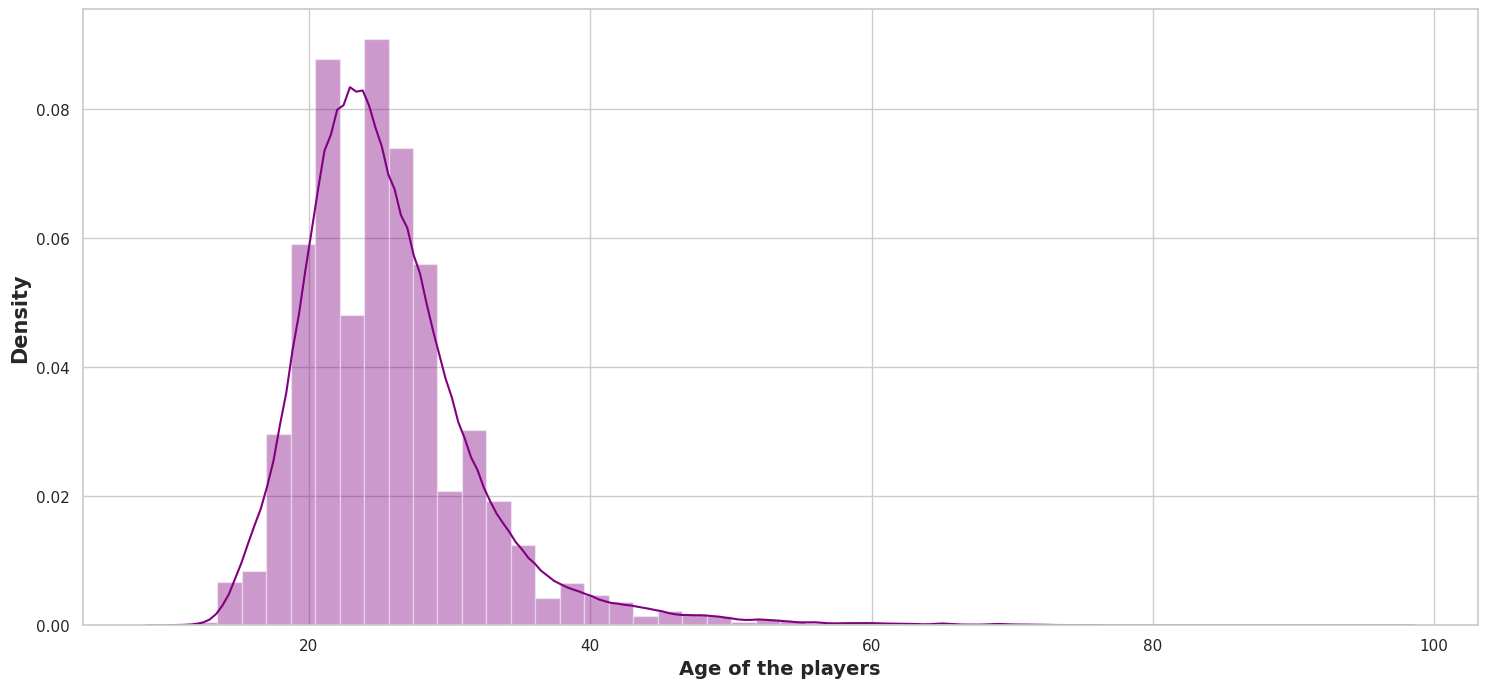

In [6]:
plt.figure(figsize=(18,8))
sns.set(style='whitegrid',)
sns.distplot(olympics["Age"], color="purple")
plt.xlabel("Age of the players",fontsize=14, weight="semibold")
plt.ylabel("Density",fontsize=15, weight="semibold")
plt.show()

Text(-9.194835069444443, 0.5, 'Density')

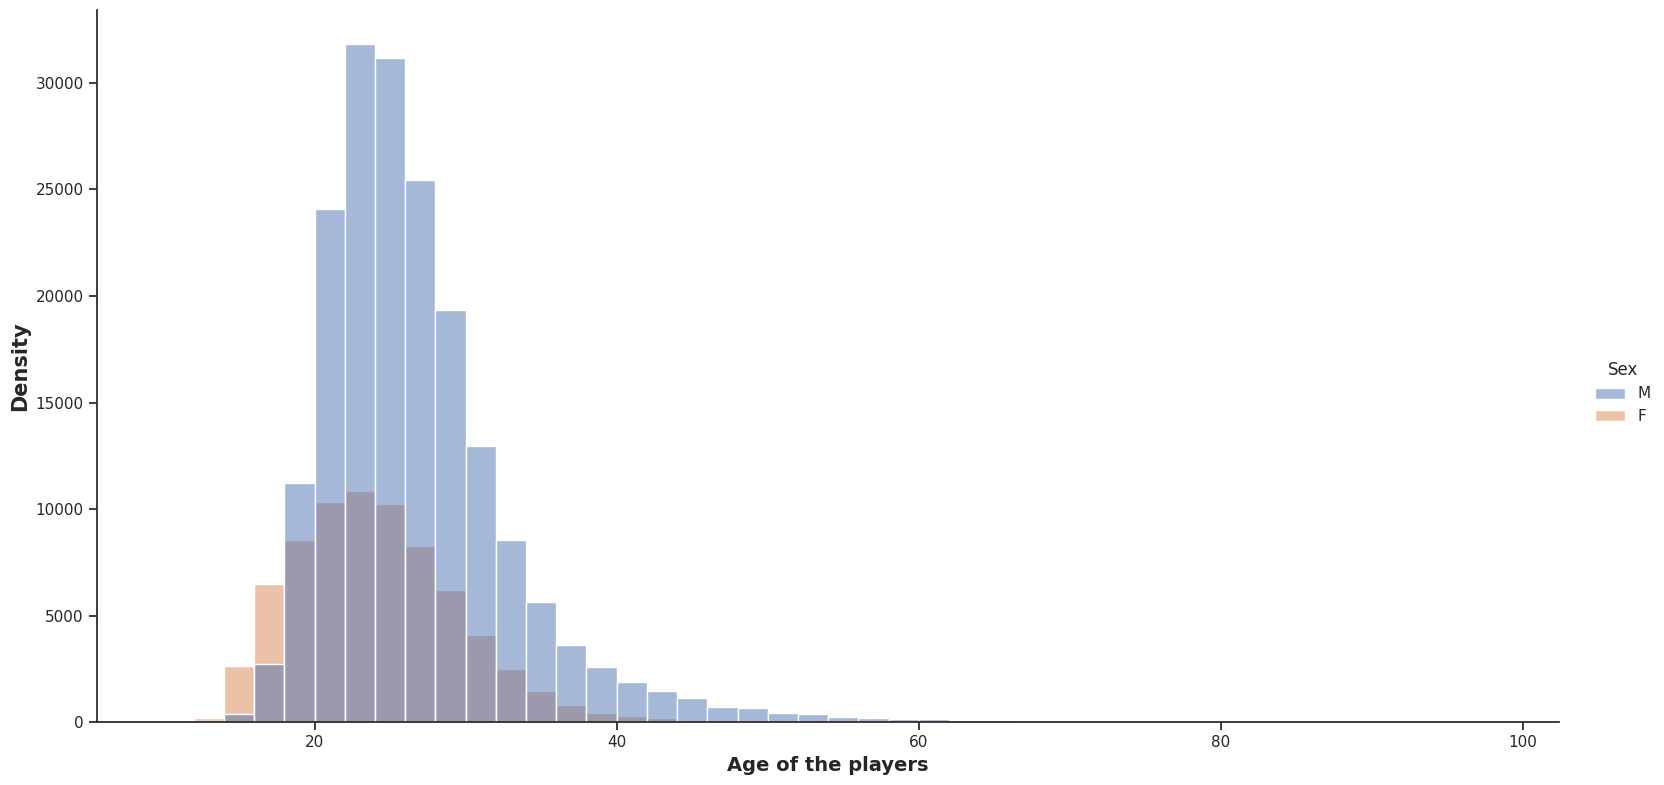

In [7]:
sns.set(style='ticks',)
sns.displot(olympics, x="Age", hue="Sex",
            alpha=0.5,
            binwidth=2,
            height=8, aspect=2)
plt.xlabel("Age of the players",fontsize=14, weight="semibold")
plt.ylabel("Density",fontsize=15, weight="semibold")

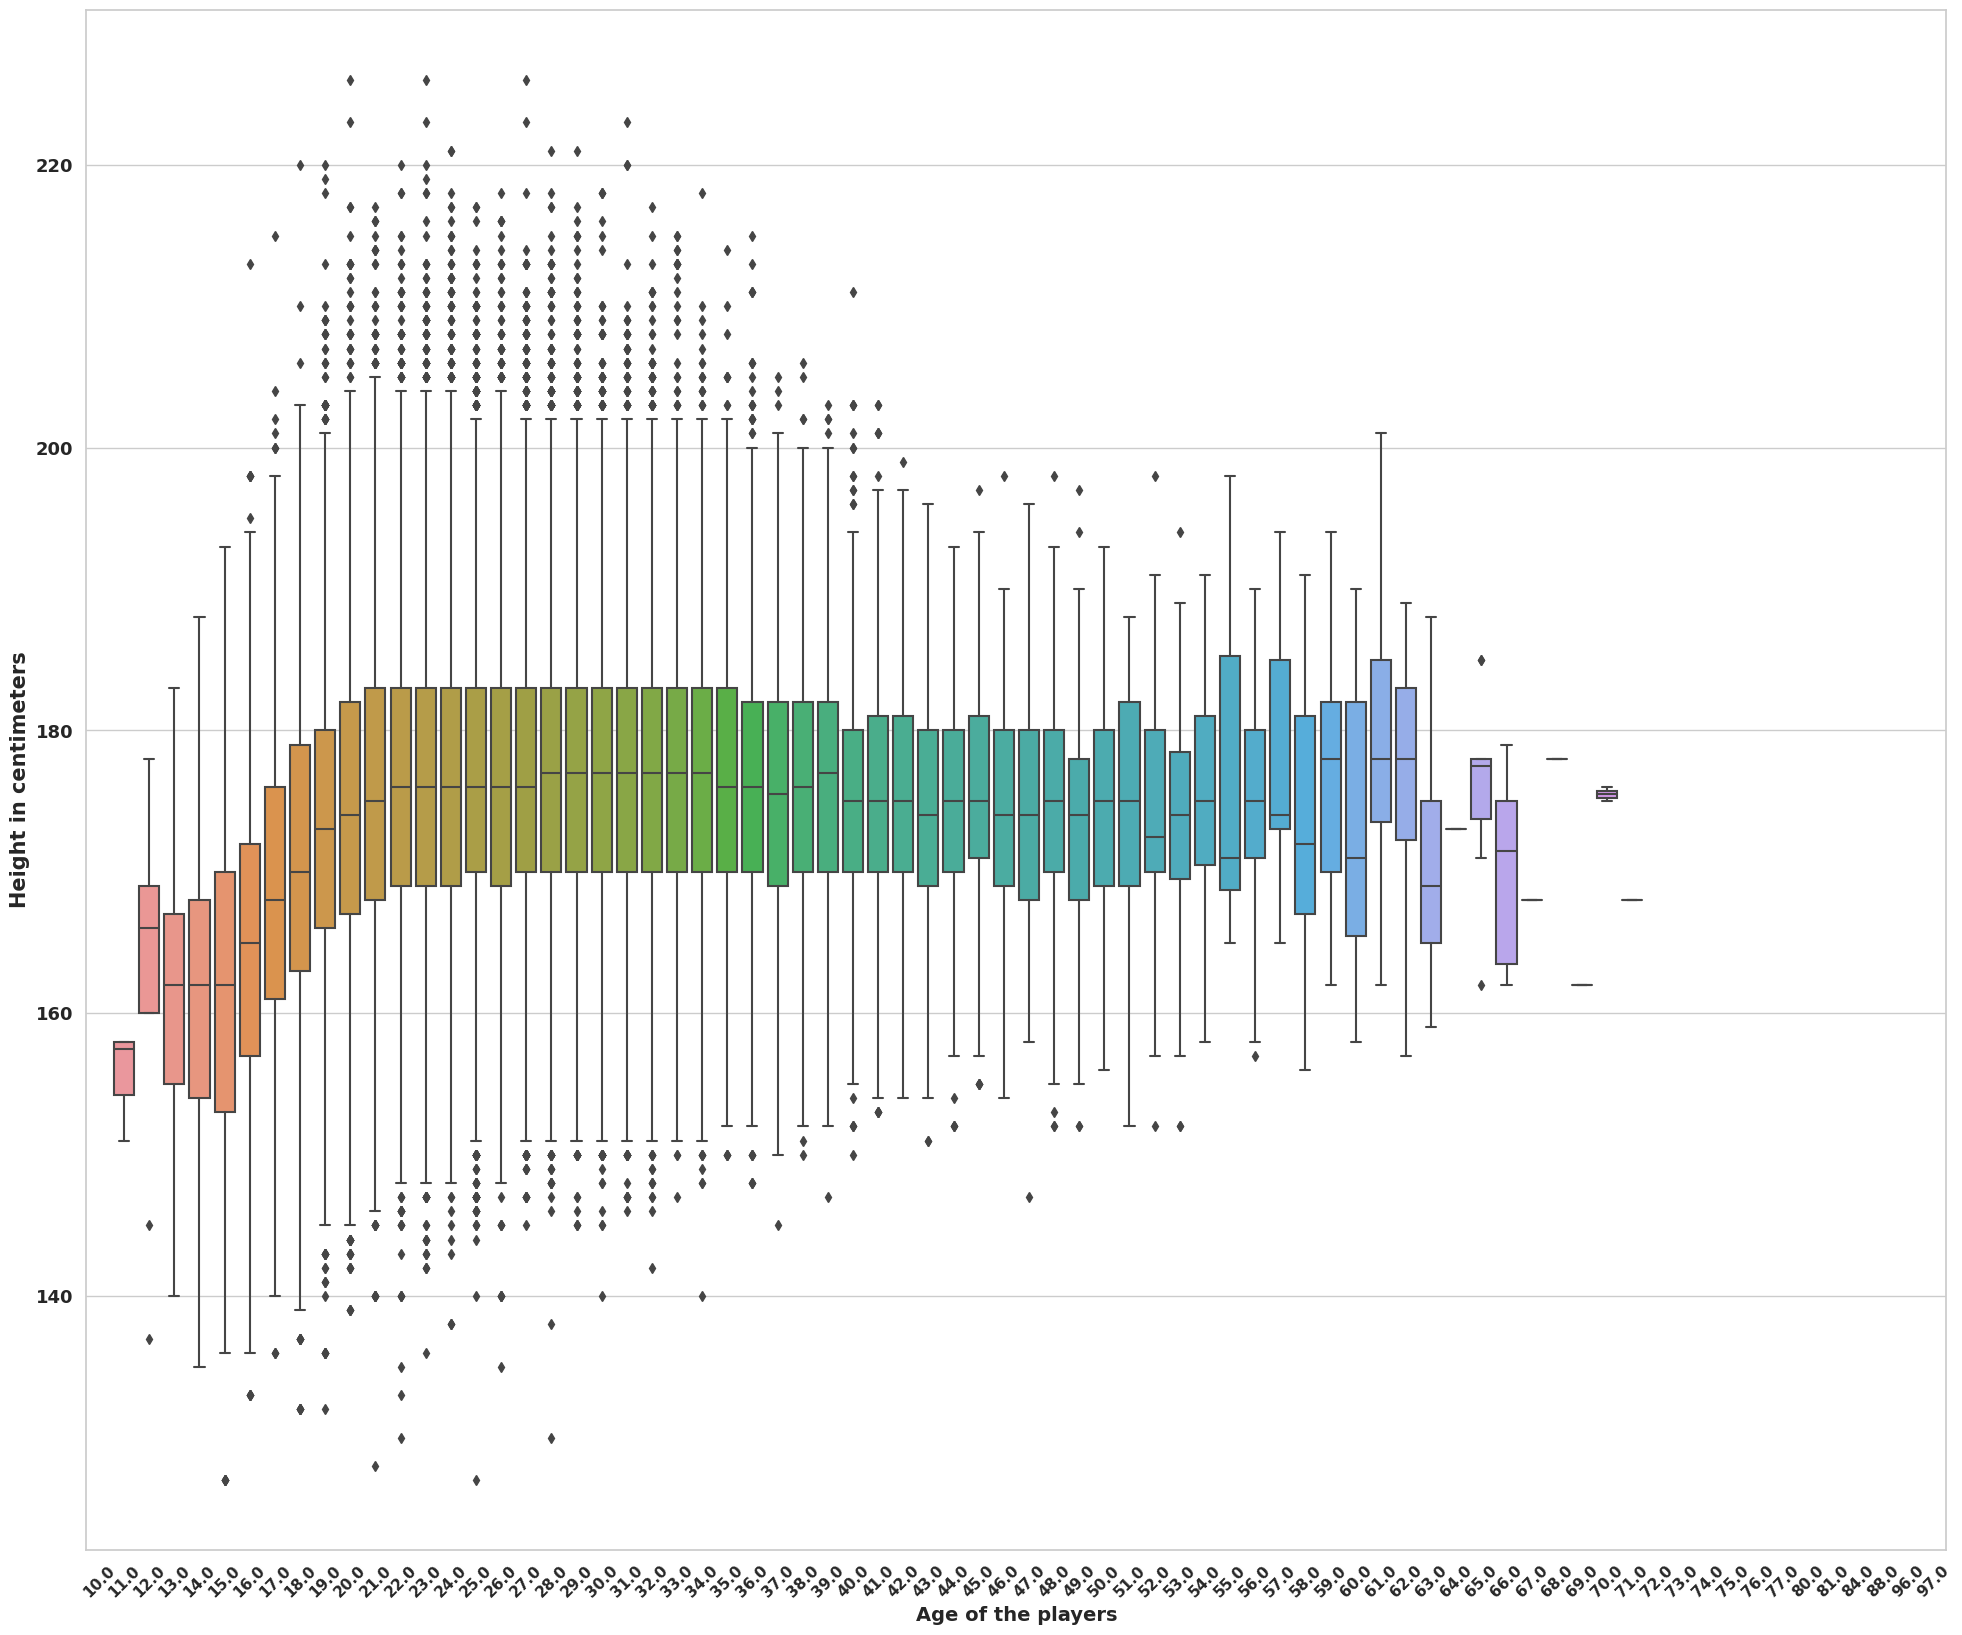

In [8]:
plt.figure(figsize=(24,20))
sns.set(style="whitegrid",)
sns.boxplot(data=olympics, x="Age", y="Height")
plt.xticks(rotation=45, weight="semibold")
plt.yticks(weight="semibold", fontsize=13)
plt.xlabel("Age of the players",fontsize=14, weight="semibold")
plt.ylabel("Height in centimeters",fontsize=15, weight="semibold")

plt.show()

# Medals

In [9]:
olympics.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [10]:
medal_players = olympics[olympics["Medal"].notna()]
medal_players.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze


In [11]:

fig = px.histogram(medal_players, x="Medal", color="Sex",
             barmode='group', title='Total medals with respect to gender', 
             color_discrete_map={"M": "RebeccaPurple", "F": "MediumPurple"},
             template='simple_white', opacity=1
            )
fig.show()

In [12]:
px.histogram(medal_players, x="Team", color="Medal",
      barmode="group")

In [13]:
#calculating total medals for each country
medal_players["Medal_Count"] = medal_players.groupby("Medal")["Medal"].transform('count')
df = medal_players.query("Medal_Count > 250")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39783 entries, 3 to 271103
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           39783 non-null  int64  
 1   Name         39783 non-null  object 
 2   Sex          39783 non-null  object 
 3   Age          39051 non-null  float64
 4   Height       31072 non-null  float64
 5   Weight       30456 non-null  float64
 6   Team         39783 non-null  object 
 7   NOC          39783 non-null  object 
 8   Games        39783 non-null  object 
 9   Year         39783 non-null  int64  
 10  Season       39783 non-null  object 
 11  City         39783 non-null  object 
 12  Sport        39783 non-null  object 
 13  Event        39783 non-null  object 
 14  Medal        39783 non-null  object 
 15  Medal_Count  39783 non-null  int64  
dtypes: float64(3), int64(3), object(10)
memory usage: 5.2+ MB


In [14]:
#px.histogram(df, x="Team", color="Medal", barmode="group")
#df.info()